<a href="https://colab.research.google.com/github/HiralJain112/Python_notebooks/blob/main/Tensorflow_classification_cancer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/cancer_classification.csv')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


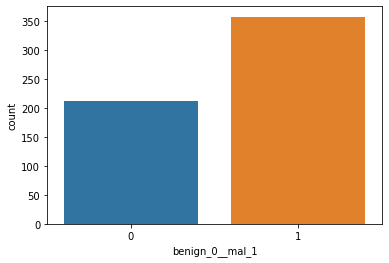

In [4]:
sns.countplot(x='benign_0__mal_1',data =df)

In [5]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

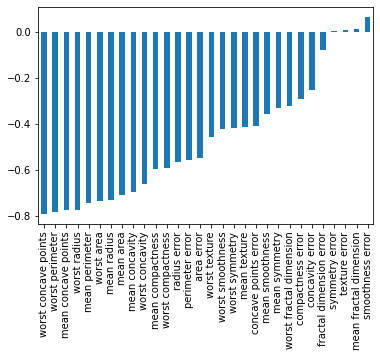

In [6]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

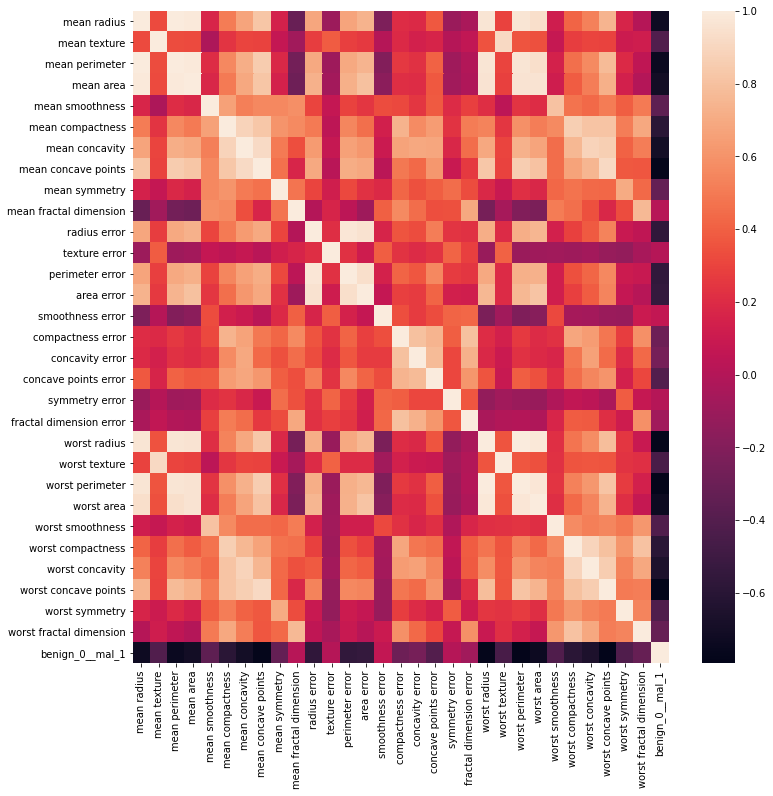

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [8]:
X = df.drop('benign_0__mal_1',axis =1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
from tensorflow.keras.layers import Dense,Dropout

In [16]:
X_train.shape

(455, 30)

In [17]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15,activation='relu'))
# BINARY CLASSIFICATION
model.add(Dense(1, activation ='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [18]:
model.fit(x= X_train, y= y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
15/15 [==============================] - 1s 36ms/step - loss: 0.6670 - val_loss: 0.6511
Epoch 2/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6277 - val_loss: 0.6037
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5851 - val_loss: 0.5396
Epoch 4/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5065 - val_loss: 0.4796
Epoch 5/600
15/15 [==============================] - 0s 6ms/step - loss: 0.4711 - val_loss: 0.4273
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4207 - val_loss: 0.3825
Epoch 7/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3760 - val_loss: 0.3424
Epoch 8/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3317 - val_loss: 0.3101
Epoch 9/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2962 - val_loss: 0.2819
Epoch 10/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2653 - val_loss: 0.2601
Epoch 11

In [19]:
losses = pd.DataFrame(model.history.history)

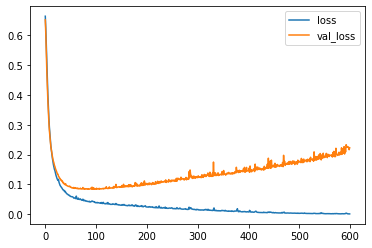

In [20]:
losses.plot()

In [21]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15,activation='relu'))
# BINARY CLASSIFICATION
model.add(Dense(1, activation ='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor ='val_loss',mode='min',verbose=1,patience=25)

In [24]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks = [early_stop])

Epoch 1/600
15/15 [==============================] - 1s 15ms/step - loss: 0.7185 - val_loss: 0.6736
Epoch 2/600
15/15 [==============================] - 0s 6ms/step - loss: 0.6670 - val_loss: 0.6454
Epoch 3/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6408 - val_loss: 0.6123
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6112 - val_loss: 0.5719
Epoch 5/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5654 - val_loss: 0.5294
Epoch 6/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5251 - val_loss: 0.4825
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.4744 - val_loss: 0.4305
Epoch 8/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4205 - val_loss: 0.3774
Epoch 9/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3741 - val_loss: 0.3320
Epoch 10/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3221 - val_loss: 0.3011
Epoch 11

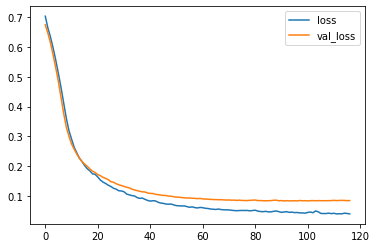

In [25]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [26]:
from tensorflow.keras.layers import Dropout

In [27]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
#BINARY CLASSIFICATION 
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [28]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks = [early_stop])

Epoch 1/600
15/15 [==============================] - 1s 15ms/step - loss: 0.6508 - val_loss: 0.6524
Epoch 2/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6629 - val_loss: 0.6286
Epoch 3/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6371 - val_loss: 0.6037
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6245 - val_loss: 0.5787
Epoch 5/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5878 - val_loss: 0.5430
Epoch 6/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5458 - val_loss: 0.5121
Epoch 7/600
15/15 [==============================] - 0s 6ms/step - loss: 0.5309 - val_loss: 0.4827
Epoch 8/600
15/15 [==============================] - 0s 6ms/step - loss: 0.5207 - val_loss: 0.4534
Epoch 9/600
15/15 [==============================] - 0s 6ms/step - loss: 0.5049 - val_loss: 0.4254
Epoch 10/600
15/15 [==============================] - 0s 7ms/step - loss: 0.4913 - val_loss: 0.4055
Epoch 11

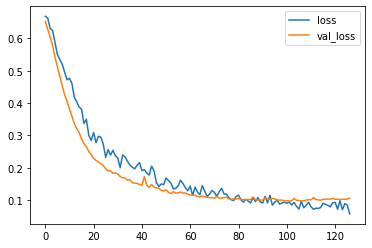

In [29]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [32]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[36  2]
 [ 3 73]]


              precision    recall  f1-score   support

           0       0.92      0.95      0.94        38
           1       0.97      0.96      0.97        76

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

